<a href="https://colab.research.google.com/github/tomafischer/ai_geeks/blob/main/statistics/Plot_snippets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

# Matplotlib 
### Adding Gridlines 
http://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/
### Legend
https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Bar Plots 
Great for categorical data

In [2]:
# create data
# An m × n matrix: the m rows are horizontal and the n columns are vertical. 
rows = 20 # rows (m)
cols = 6 # columns (n)
data  = np.zeros((rows,cols))

# growing data threwout the series
for i in range(cols):
  data[:,i] = 25 * np.random.randn(rows) * (2*i/(cols-1)-1)**2 + (i+1)**2

In [ ]:
data_pd = pd.DataFrame(data = data)
data_pd.info()
data_pd.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       30 non-null     float64
 1   1       30 non-null     float64
 2   2       30 non-null     float64
 3   3       30 non-null     float64
 4   4       30 non-null     float64
dtypes: float64(5)
memory usage: 1.3 KB


,0,1,2,3,4
count,30.000000,30.000000,30.0,30.000000,30.000000
mean,3.149585,5.115782,9.0,15.134793,23.739946
std,23.371389,5.768305,0.0,5.205133,24.735715
min,-37.453650,-7.473521,9.0,2.741064,-31.174545
25%,-11.473867,1.731705,9.0,11.516913,7.947758
50%,3.901543,6.162475,9.0,16.535488,22.503356
75%,24.241503,9.192332,9.0,18.721378,41.162162
max,47.047470,16.271449,9.0,27.065402,72.282635


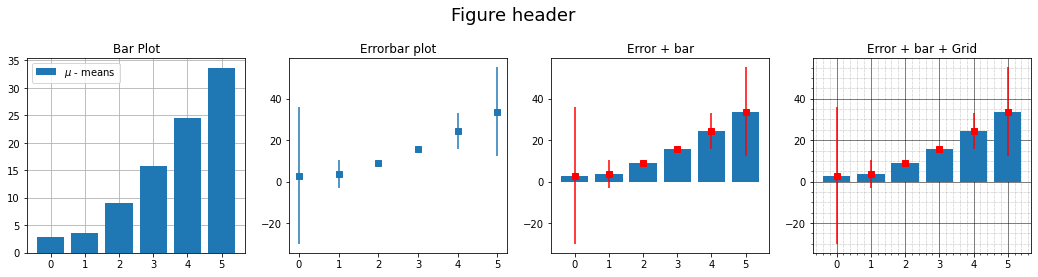

In [3]:
fig, axs = plt.subplots(1,4, figsize= (18,4))
# fig = plt.figure()

### First
ax = axs[0]
# naked bsars - using greek letters 
ax.bar(range(cols), np.mean(data, axis=0), label='$\mu$ - means')
ax.set_title("Bar Plot")
# adding grid lines
ax.set_axisbelow(True)
ax.grid(True)
# adding legend
ax.legend()

### Second
ax = axs[1]
ax.errorbar(range(cols), np.mean(data, axis=0),np.std(data, axis= 0, ddof =1), marker='s', linestyle='')
ax.set_title('Errorbar plot')
#figure header adjustments
fig.suptitle("Figure header", fontsize= 18)
plt.subplots_adjust(top=0.8)


### Third
ax = axs[2]
ax.bar(range(cols), np.mean(data, axis=0), label='means')
ax.errorbar(range(cols), np.mean(data, axis=0),np.std(data, axis= 0, ddof =1), marker='s', linestyle='', color='r')
ax.set_title('Error + bar')

### Forth with Grid
ax = axs[3]
ax.bar(range(cols), np.mean(data, axis=0), label='means')
ax.errorbar(range(cols), np.mean(data, axis=0),np.std(data, axis= 0, ddof =1), marker='s', linestyle='', color='r')
ax.set_title('Error + bar + Grid')
### Grid 
# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)
ax.grid(True)
# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')


plt.show()

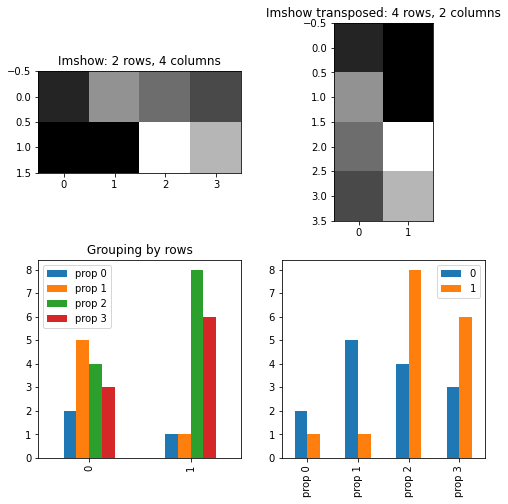

In [ ]:
# plotting from pandas
m = [ [2,5,4,3], [1,1,8,6] ]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8,8))

# conceptualizing the data 
ax = axs[0,0]
ax.imshow(m, cmap='gray')
ax.set_title('Imshow: 2 rows, 4 columns')
ax = axs[1,0]
df = pd.DataFrame(m, columns=['prop 0', 'prop 1', 'prop 2', 'prop 3'])
df.plot(ax = ax, kind='bar')
ax.set_title('Grouping by rows')
# Transposed
ax = axs[0,1]
ax.imshow(np.array(m).T, cmap='gray' )
ax.set_title("Imshow transposed: 4 rows, 2 columns")
ax = axs[1,1]
df.T.plot(ax = ax, kind='bar')

plt.show()

# Line Plots
https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

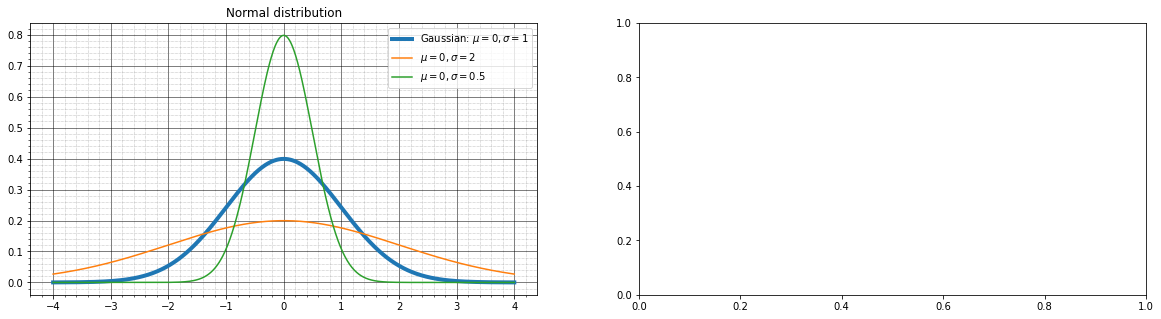

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
# number of discretizations
N= 1001
x = np.linspace(-4,4,N)
gausdist = stats.norm.pdf(x)

fig, axs = plt.subplots(1,2, figsize=(20,5))
ax = axs[0]

ax.set_title("Normal distribution")
ax.plot(x,gausdist, linewidth = 4 ,label="Gaussian: $\mu =0, \sigma =1$")
ax.plot(x, stats.norm.pdf(x,loc=0, scale =2), label ="$\mu =0, \sigma =2$")
ax.plot(x, stats.norm.pdf(x, loc=0, scale =0.5), label="$\mu = 0, \sigma = 0.5$" )
ax.legend()
ax.grid(True)
# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()
# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='black')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')

plt.show()

# Box and Whisker Plots
Box plot Seaborn:
https://seaborn.pydata.org/generated/seaborn.boxplot.html

Additional boxplot parameters: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html#matplotlib.axes.Axes.boxplot


If you pass the whole Pandas array it will use each numeric column for x and it's values for y

If you have categorical columns pass those as x an hue

```
     Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR 
                  |-----:-----|
  o      |--------|     :     |--------|    o  o  
                  |-----:-----|
flier             <----------->            fliers
                       IQR
```
The box extends from the first quartile (Q1) to the third quartile (Q3) of the data, with a line at the median. The whiskers extend from the box by 1.5x the inter-quartile range (IQR). Flier points are those past the end of the whiskers.

In [ ]:
# create data
rows = 30 # m
cols = 5  # n

data = np.zeros((rows, cols))
for i in range(cols):
  data[:,i] = 25 * np.random.randn(rows) * (2*i/(cols-1)-1)**2 + (i+1)**2

data_pd = pd.DataFrame(data = data, columns = ['feature 1', 'feature 2', 'feature 3', 'feature 4', 'feature 5'])

data_pd.describe()

,feature 1,feature 2,feature 3,feature 4,feature 5
count,30.000000,30.000000,30.0,30.000000,30.000000
mean,3.149585,5.115782,9.0,15.134793,23.739946
std,23.371389,5.768305,0.0,5.205133,24.735715
min,-37.453650,-7.473521,9.0,2.741064,-31.174545
25%,-11.473867,1.731705,9.0,11.516913,7.947758
50%,3.901543,6.162475,9.0,16.535488,22.503356
75%,24.241503,9.192332,9.0,18.721378,41.162162
max,47.047470,16.271449,9.0,27.065402,72.282635


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


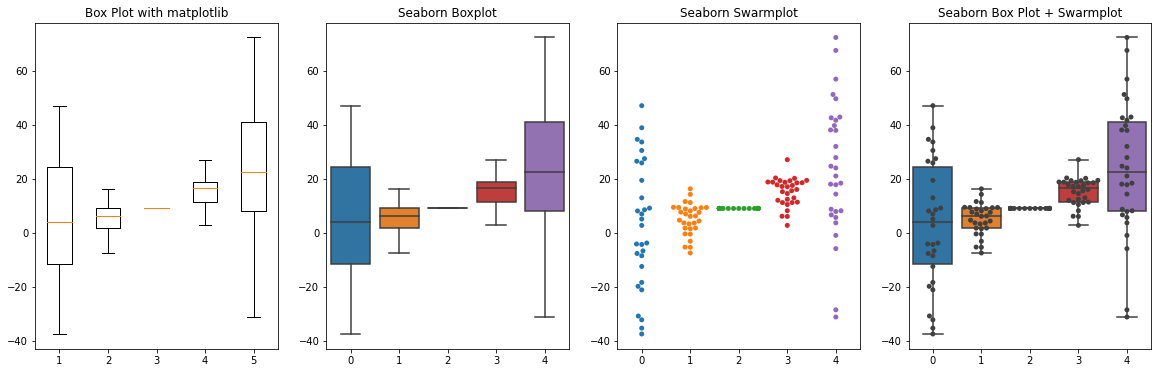

In [ ]:
fig, axs = plt.subplots(1,4,figsize=(20,6))
ax = axs[0]
# matplotlib
ax.boxplot(data, meanline=True)
ax.set_title("Box Plot with matplotlib")

ax = axs[1]
# seaborn
sns.boxplot(ax= ax, data=data_pd, orient='v', meanline=True)
ax.set_title('Seaborn Boxplot')


ax = axs[2]
# seaborn
sns.swarmplot(ax= ax, data=data_pd, orient='v')
ax.set_title('Seaborn Swarmplot')

ax = axs[3]
# seaborn
sns.boxplot(ax= ax, data=data_pd, orient='v')
sns.swarmplot(ax= ax, data=data_pd, color='.25')
ax.set_title('Seaborn Box Plot + Swarmplot')


plt.show()

In [ ]:
tips = sns.load_dataset("tips")

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


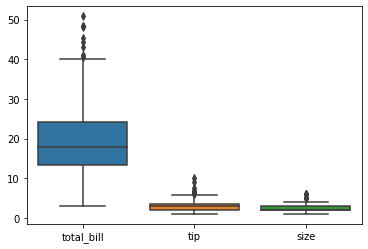

In [ ]:
sns.boxplot(data = tips)

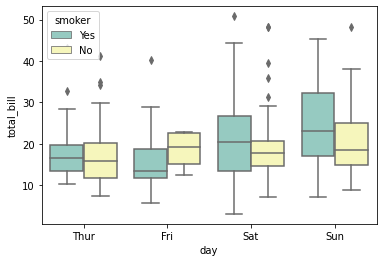

In [ ]:
ax = sns.boxplot(x="day", y="total_bill", hue="smoker",
                 data=tips, palette="Set3")

# Histograms
## Bar Plot vs. Histograms
**Bar Plots** have **categories** on the x-axis

**Historgrams** have **binned continuous data** on the x-axis

Key Question: Can you swap the locations of the x-axis? yes -> bar plot.
The shape of a histogram is important, the shape of a bar plot is not.

Documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


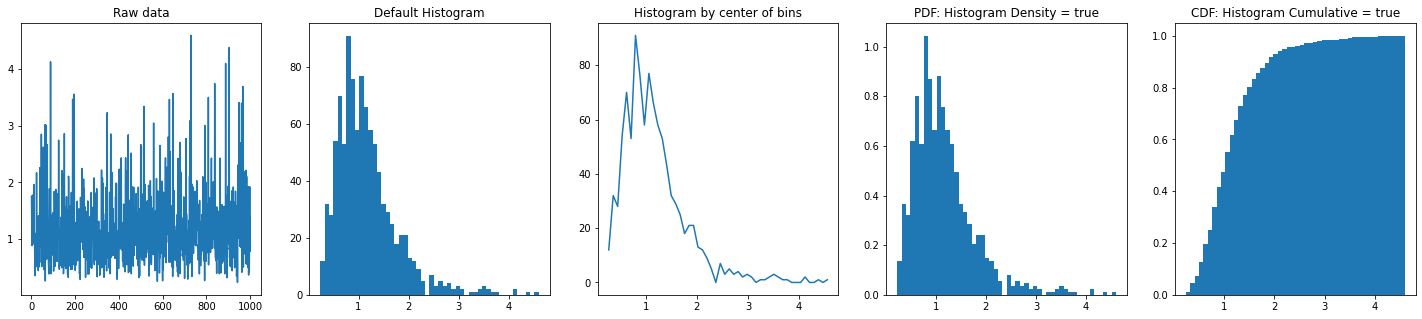

In [ ]:
N = 1000
# log-normal distribution
data = np.exp(np.random.randn(N)/2)
x_data = np.linspace(1,N, N)
bins = 50

fig, axs = plt.subplots(1, 5, figsize=(25,5))
# Raw data
ax = axs[0]
ax.set_title("Raw data")
ax.plot(x_data, data)


# histogram
ax = axs[1]
ax.set_title("Default Histogram")
ax.hist(data, bins = bins )


# histogram by center
ax= axs[2]
ax.set_title("Histogram by center of bins")
# getting number for histograms from numpy
y,x = np.histogram(data, bins =bins)
# bin -centers getting the mean between each item and it's next
xx = (x[1:] + x[:-1]) / 2. # x[1:] gets the second until the end
ax.plot(xx,y)

# histogram
ax = axs[3]
ax.set_title("PDF: Histogram Density = true")
ax.hist(data, bins = bins, density=True )

# histogram
ax = axs[4]
ax.set_title("CDF: Histogram Cumulative = true")
ax.hist(data, bins = bins,  cumulative=True, density=True )

plt.show()